Таблица рассчётов для завода А:
   ΔXi  ΔNi      Ni/N        Fn        F0
0 -0.7    5  0.192308  0.000000  0.072068
1 -0.3    4  0.153846  0.192308  0.196168
2 -0.1    2  0.076923  0.346154  0.290199
3  0.5    6  0.230769  0.423077  0.638689
4  0.8    3  0.115385  0.653846  0.790696
5  0.9    1  0.038462  0.769231  0.831505
6  1.0    3  0.115385  0.807692  0.866807
7  1.2    1  0.038462  0.923077  0.921321
8  1.3    1  0.038462  0.961538  0.941244
KC для завода А:  1.099411163386917

Таблица рассчётов для завода В:
    ΔXi  ΔNi      Ni/N        Fn        F0
0  -0.6    4  0.235294  0.000000  0.322745
1  -0.1    5  0.294118  0.235294  0.378638
2   0.4    3  0.176471  0.529412  0.437196
3   0.7    2  0.117647  0.705882  0.473093
4   1.0    2  0.117647  0.823529  0.509211
5  14.0    1  0.058824  0.941176  0.999961
KC для завода В:  1.3307099927494737


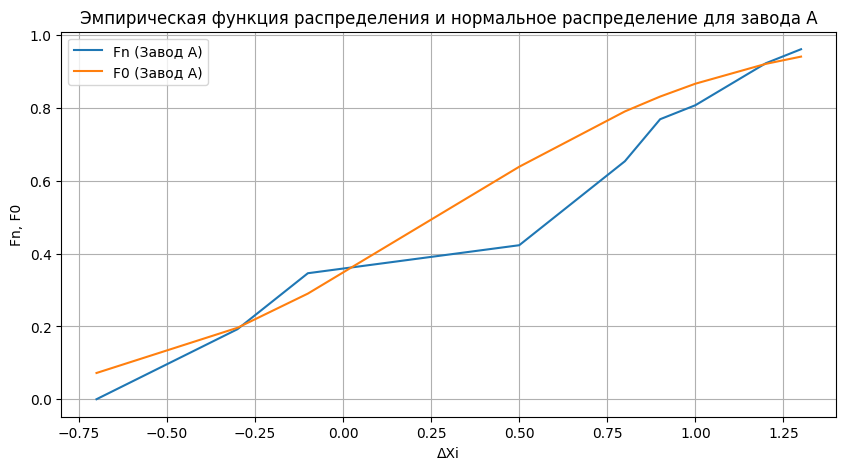

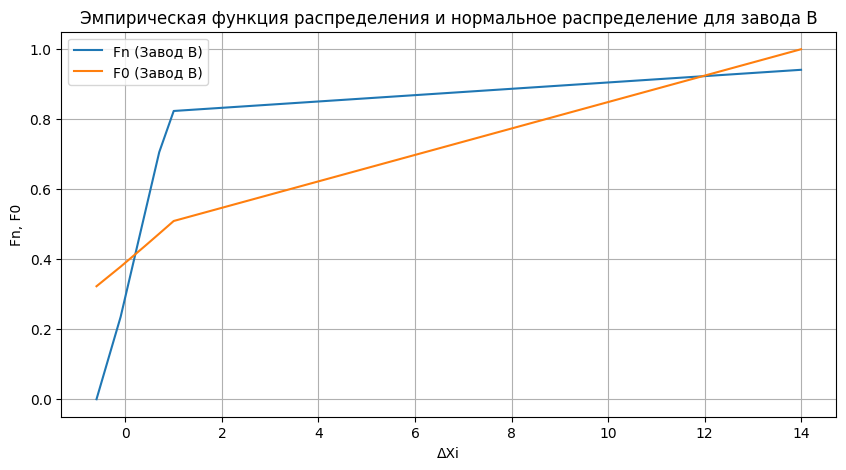


Выводы:
Для завода А:
Гипотеза о совпадении эмпирического и теоретического распределений не отвергается, так как 1.099411163386917 < 1.358
Для завода В:
Гипотеза о совпадении эмпирического и теоретического распределений не отвергается, так как 1.3307099927494737 < 1.358


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Данные завода А
delta_xi_A = np.array([-0.7, -0.3, -0.1, 0.5, 0.8, 0.9, 1, 1.2, 1.3])
ni_A = np.array([5, 4, 2, 6, 3, 1, 3, 1, 1])

# Данные завода В
delta_xi_B = np.array([-0.6, -0.1, 0.4, 0.7, 1, 14])
mi_B = np.array([4, 5, 3, 2, 2, 1])


# Вычисление эмпирической функции распределения
Fn_A = np.cumsum(ni_A) / np.sum(ni_A)
x=0
Fn_a_new = np.insert(Fn_A, 0, x)
Fn_a_new_2 = np.delete(Fn_a_new, -1)

Fn_B = np.cumsum(mi_B) / np.sum(mi_B)
y=0
Fn_b_new = np.insert(Fn_B, 0, y)
Fn_b_new_2 = np.delete(Fn_b_new, -1)

# Вычисление среднего и стандартного отклонения для завода А
mean_A = np.sum(delta_xi_A * ni_A) / np.sum(ni_A)
std_A = np.sqrt(np.sum(ni_A * (delta_xi_A - mean_A)**2) / np.sum(ni_A))

# Вычисление нормального распределения для завода А
F0_A = norm.cdf((delta_xi_A - mean_A) / std_A)

# Вычисление KC для завода А
KC_A = np.sqrt(np.sum(ni_A)) * np.max(np.abs(Fn_a_new_2 - F0_A))

# Создание DataFrame для завода А
data_A = {
    'ΔXi': delta_xi_A,
    'ΔNi': ni_A,
    'Ni/N': ni_A / np.sum(ni_A),
    'Fn': Fn_a_new_2,
    'F0': F0_A,
}
df_A = pd.DataFrame(data_A)

# Вывод таблицы для завода А
print("Таблица рассчётов для завода А:")
print(df_A)
print("KC для завода А: ", KC_A)

# Вычисление среднего и стандартного отклонения для завода А
mean_B = np.sum(delta_xi_B * mi_B) / np.sum(mi_B)
std_B = np.sqrt(np.sum(mi_B * (delta_xi_B - mean_B)**2) / np.sum(mi_B))


# Вычисление нормального распределения для завода В
F0_B = norm.cdf((delta_xi_B - mean_B) / std_B)

# Вычисление KC для завода В
KC_B = np.sqrt(np.sum(mi_B)) * np.max(np.abs(Fn_b_new_2 - F0_B))

# Создание DataFrame для завода В
data_B = {
    'ΔXi': delta_xi_B,
    'ΔNi': mi_B,
    'Ni/N': mi_B / np.sum(mi_B),
    'Fn': Fn_b_new_2,
    'F0': F0_B,
}
df_B = pd.DataFrame(data_B)

# Вывод таблицы для завода В
print("\nТаблица рассчётов для завода В:")
print(df_B)
print("KC для завода В: ", KC_B)
# Визуализация эмпирической функции распределения и нормального распределения для завода А
plt.figure(figsize=(10, 5))
plt.plot(delta_xi_A, Fn_a_new_2, label='Fn (Завод А)')
plt.plot(delta_xi_A, F0_A, label='F0 (Завод А)')
plt.legend()
plt.title('Эмпирическая функция распределения и нормальное распределение для завода А')
plt.xlabel('ΔXi')
plt.ylabel('Fn, F0')
plt.grid(True)
plt.show()

# Визуализация эмпирической функции распределения и нормального распределения для завода В
plt.figure(figsize=(10, 5))
plt.plot(delta_xi_B, Fn_b_new_2, label='Fn (Завод В)')
plt.plot(delta_xi_B, F0_B, label='F0 (Завод В)')
plt.legend()
plt.title('Эмпирическая функция распределения и нормальное распределение для завода В')
plt.xlabel('ΔXi')
plt.ylabel('Fn, F0')
plt.grid(True)
plt.show()

# Вывод выводов о принятии или отклонении гипотезы
alpha = 0.05  # Уровень значимости
critical_value = 1.358  # Табличное значение КС для α = 0.05

print("\nВыводы:")
print("Для завода А:")
if KC_A > critical_value:
    print(f"Гипотеза о совпадении эмпирического и теоретического распределений отвергается, так как {KC_A} > {critical_value}")
else:
    print(f"Гипотеза о совпадении эмпирического и теоретического распределений не отвергается, так как {KC_A} < {critical_value}")

print("Для завода В:")
if KC_B > critical_value:
    print(f"Гипотеза о совпадении эмпирического и теоретического распределений отвергается, так как {KC_A} > {critical_value}")
else:
    print(f"Гипотеза о совпадении эмпирического и теоретического распределений не отвергается, так как {KC_B} < {critical_value}")